<body>
    <section style="border:1px solid RoyalBlue;">
        <section style="background-color:White; font-family:Georgia;text-align:center">
            <h1 style="color:RoyalBlue">Introduction to Data Science</h1>
            <h2 style="color:RoyalBlue">Dr.	Casey Kennington</h1>
            <h2 style="font-family:Courier; text-align:center;">CS-533</h2>
            <br>
            <h2 style="font-family:Garamond;">Gerardo Caracas Uribe</h2>
            <h2 style="font-family:Garamond;">Student ID: 114104708</h2>
            <h2 style="font-family:Courier;">Homework #5 Plotting</h2>
            <hr/>
        </section>
    </section>
</body>

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Unit 41</h2>
        <h3 style="font-family:Garamond;">Basic Plotting with PyPlot</h3>
        <hr/>
    </section>
</body>

In [1]:
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd
import numpy as np

# The NIAA frame has been pickled before
alco = pickle.load(open("alco.pickle","rb"))
del alco["Total"]
columns, years = alco.unstack().columns.levels

# The state abbreviations come straight from the file
states = pd.read_csv("states.csv",names=("State", "Standard", "Postal", "Capital"),delimiter="\t")
states.set_index("State", inplace=True)

# Alcohol consumption will be sorted by year 2009
frames = [pd.merge(alco[column].unstack(), states, left_index=True, right_index=True).sort_values(2009) for column in columns]

#How many years are covered
span=max(years) - min(years)+1

/home/gcaracas/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


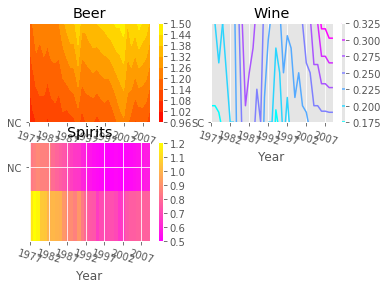

In [2]:
# Select a good looking style
matplotlib.style.use("ggplot")
STEP=5
#Plot each frame in a subplot
for pos, (draw, style, column, frame) in enumerate(zip((plt.contourf, plt.contour, plt.imshow),(plt.cm.autumn, plt.cm.cool, plt.cm.spring), columns, frames)):
    #Select the subplot with 2 rows and columns
    plt.subplot(2, 2, pos+1)
    
    # Plot the frame
    draw(frame[frame.columns[:span]], cmap=style, aspect="auto")
    
    # Add embellishments
    plt.colorbar()
    plt.title(column)
    plt.xlabel("Year")
    plt.xticks(range(0, span, STEP), frame.columns[:span:STEP])
    plt.yticks(range(0, frame.shape[0], STEP), frame.Postal[::STEP])
    plt.xticks(rotation=-17)

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Unit 43</h2>
        <h3 style="font-family:Garamond;">Mastering embellishments</h3>
        <hr/>
    </section>
</body>

/home/gcaracas/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/home/gcaracas/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
/home/gcaracas/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


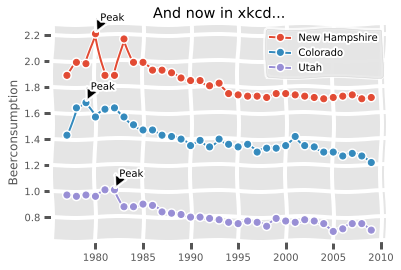

In [3]:
# The NIAA frame has been pickled before
alco = pickle.load(open("alco.pickle","rb"))

#Select the rigth data
BEVERAGE = "Beer"
years = alco.index.levels[1]
years = (np.sort(alco.index.levels[1].values,  axis=None)[::-1])
states=("New Hampshire", "Colorado", "Utah")

#Select a good-looking style
plt.xkcd()
matplotlib.style.use("ggplot")

# Plot the charts
for state in states:
    ydata = alco.ix[state][BEVERAGE]
    plt.plot(years, ydata, "-o")
    # Add annotations with arrows
    plt.annotate(s="Peak", xy=(ydata.argmax(), ydata.max()), xytext=(ydata.argmax() + 0.5, ydata.max() + 0.1), arrowprops={"facecolor":"black", "shrink":0.2})
# Add labels and leyends
plt.ylabel(BEVERAGE + "consumption")
plt.title("And now in xkcd...")
plt.legend(states)

plt.savefig("pyplot-leyend-xkcd.pdf")

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Unit 44</h2>
        <h3 style="font-family:Garamond;">Plotting with Pandas</h3>
        <hr/>
    </section>
</body>

/home/gcaracas/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/home/gcaracas/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


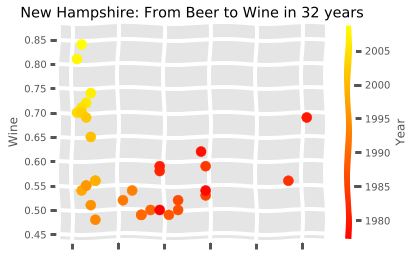

In [4]:
# The NIAA frame has been pickled before
alco = pickle.load(open("alco.pickle","rb"))

#Select a good-looking style
matplotlib.style.use("ggplot")

# Do the scatter plot
STATE="New Hampshire"
statedata = alco.ix[STATE].reset_index()
statedata.plot.scatter("Beer","Wine", c="Year", s=100, cmap=plt.cm.autumn)

plt.title("%s: From Beer to Wine in 32 years" % STATE)
plt.savefig("scatter-plot.pdf")


/home/gcaracas/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/home/gcaracas/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  # This is added back by InteractiveShellApp.init_path()
/home/gcaracas/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


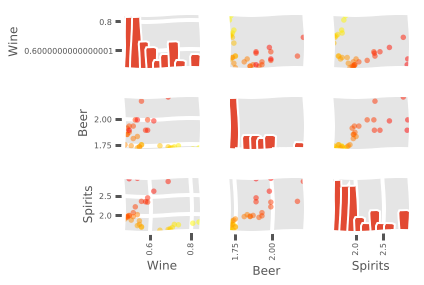

In [5]:
from pandas.tools.plotting import scatter_matrix
# The NIAA frame has been pickled before
alco = pickle.load(open("alco.pickle","rb"))

#Select a good-looking style
matplotlib.style.use("ggplot")

# Plot the scatter matrix
STATE="New Hampshire"
statedata = alco.ix[STATE].reset_index()
scatter_matrix(statedata[["Wine","Beer","Spirits"]], s=120, c=statedata["Year"], cmap=plt.cm.autumn)
plt.tight_layout()

plt.savefig("scatter-matrix.pdf")

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Yourt Turn, Page 146</h2>
        <h3 style="font-family:Garamond;">American Pie</h3>
        <hr/>
    </section>
</body>

/home/gcaracas/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


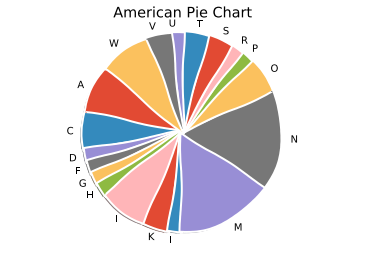

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

states = pd.read_csv("states.csv",names=("State", "Standard", "Postal", "Capital"),delimiter="\t")
statesAb = states['Postal']
l=[]
c=[]
letters = Counter([i[0] for i in statesAb])
for item,count in letters.items():
    l.append(item)
    c.append(count)

matplotlib.style.use("ggplot")
plt.pie(c, labels=l, shadow=True, startangle=140)
plt.axis('equal')
plt.title("American Pie Chart")
plt.show()
